In [13]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')

import time

## Guided Example

__Goal:__ Predict a recipe's rating from ingredient and keyword list

__Dataset:__ [Epicurious Recipes](https://www.kaggle.com/hugodarwood/epirecipes)

In [2]:
raw_data = pd.read_csv('epi_r.csv')

In [4]:
#list(raw_data.columns)
raw_data.rating.describe()

count    20052.000000
mean         3.714467
std          1.340829
min          0.000000
25%          3.750000
50%          4.375000
75%          4.375000
max          5.000000
Name: rating, dtype: float64

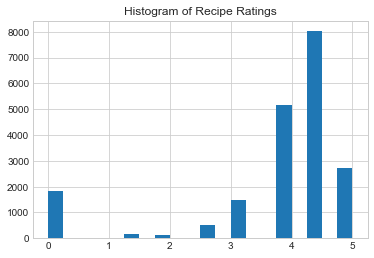

In [9]:
raw_data.rating.hist(bins=20)
plt.title('Histogram of Recipe Ratings')
plt.show()

__Result:__ 
- There are ~20,000 recipes with an average rating of 3.71
- 25th percentile is above the mean; likely outlier population (very low reviews on bad recipes)
- Data is not continuous, no recipe has a 3.5 rating
- Increase of count at 0 rating

In [10]:
#data cleaning
#count nulls
null_count = raw_data.isnull().sum()
null_count[null_count>0]

calories    4117
protein     4162
fat         4183
sodium      4119
dtype: int64

In [11]:
#lots of missing nutrition info, drop these columns
from sklearn.svm import SVR
svr = SVR()
X = raw_data.drop(['rating','title','calories','protein','fat','sodium'], 1)
Y = raw_data.rating

start_time = time.clock()
svr.fit(X,Y)
print('\nruntime:\n',time.clock() - start_time, "seconds")

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

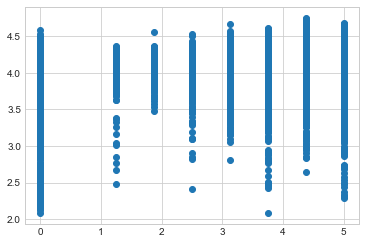

In [12]:
plt.scatter(Y, svr.predict(X))
plt.show()

In [14]:
start_time = time.clock()

print(svr.score(X,Y))
print('\nruntime:\n',time.clock() - start_time, "seconds")

0.03856570651298896

runtime:
 301.56737899999996 seconds


In [15]:
from sklearn.model_selection import cross_val_score
start_time = time.clock()
print(cross_val_score(svr,X,Y,cv=5))
print('\nruntime:\n',time.clock() - start_time, "seconds")

[0.01818511 0.026411   0.03037705 0.01957949 0.02451197]

runtime:
 1256.4309120000003 seconds


__Results:__ these are not good results
- Poor accuracy
- Overfitting

## Challenge
- Transform this regression problem into a binary classifier
- Clean up the feature set and cut down to 30 most valuable features